In [120]:
import tensorflow as tf
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics.pairwise import euclidean_distances
import os

# Load MNIST Dataset

In [121]:
(x_train, x_test), (y_train, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


# Split Dataset into 5x5 patches

In [122]:
patches = []
patch_size = 5
for img in x_train:
    for i in range(28 - patch_size + 1):
        for j in range(28 - patch_size + 1):
            patch = img[i:i+patch_size, j:j+patch_size]
            if np.sum(patch) > 0:  # 去除空白 patch
                patches.append(patch)
patches = np.array(patches)


In [123]:
print(patches.shape)

(20074704, 5, 5)


# Normalize Patches

In [124]:
patches = patches.reshape(patches.shape[0], -1)
norms = np.linalg.norm(patches, axis=1, keepdims=True)
normalized_patches = patches / (norms + 1e-8)


# Download Models at https://drive.google.com/drive/folders/1UIBoL1jBlwqQW3qMCUYBT_p79RK9dazS?usp=sharing

# K-means Function

In [125]:
def run_kmeans(patches, k):
    print(f"正在聚类：K = {k}")
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(patches)
    return kmeans

# K=10

In [126]:
if os.path.exists("k_equals_10_models.pkl"):
    k_equals_10_models = joblib.load("k_equals_10_models.pkl")
else:
    k_equals_10_models = run_kmeans(patches, 10)
    joblib.dump(k_equals_10_models, "k_equals_10_models.pkl")

if os.path.exists("k_equals_10_normalized_models.pkl"):
    k_equals_10_normalized_models = joblib.load("k_equals_10_normalized_models.pkl")
else:
    k_equals_10_normalized_models = run_kmeans(normalized_patches, 10)
    joblib.dump(k_equals_10_normalized_models, "k_equals_10_normalized_models.pkl")

# K=50

In [127]:
if os.path.exists("k_equals_50_models.pkl"):
    k_equals_50_models = joblib.load("k_equals_50_models.pkl")
else:
    k_equals_50_models = run_kmeans(patches, 50)
    joblib.dump(k_equals_50_models, "k_equals_50_models.pkl")

if os.path.exists("k_equals_50_normalized_models.pkl"):
    k_equals_50_normalized_models = joblib.load("k_equals_50_normalized_models.pkl")
else:
    k_equals_50_normalized_models = run_kmeans(normalized_patches, 50)
    joblib.dump(k_equals_50_normalized_models, "k_equals_50_normalized_models.pkl")

# K=100

In [128]:
if os.path.exists("k_equals_100_models.pkl"):
    k_equals_100_models = joblib.load("k_equals_100_models.pkl")
else:
    k_equals_100_models = run_kmeans(patches, 100)
    joblib.dump(k_equals_100_models, "k_equals_100_models.pkl")

if os.path.exists("k_equals_100_normalized_models.pkl"):
    k_equals_100_normalized_models = joblib.load("k_equals_100_normalized_models.pkl")
else:
    k_equals_100_normalized_models = run_kmeans(normalized_patches, 100)
    joblib.dump(k_equals_100_normalized_models, "k_equals_100_normalized_models.pkl")

# K=100 Plot

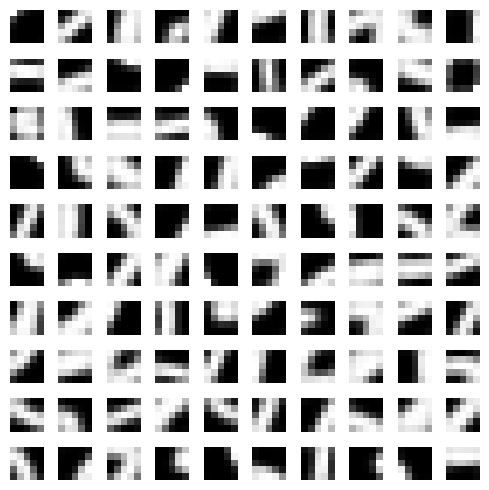

In [129]:
centers = k_equals_100_models.cluster_centers_
fig, axs = plt.subplots(10, 10, figsize=(5, 5))
for i, ax in enumerate(axs.flatten()):
    patch = centers[i].reshape(5, 5)
    ax.imshow(patch, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

# K=1000

In [130]:
if os.path.exists("k_equals_1000_models.pkl"):
    k_equals_1000_models = joblib.load("k_equals_1000_models.pkl")
else:
    k_equals_1000_models = run_kmeans(patches, 1000)
    joblib.dump(k_equals_1000_models, "k_equals_1000_models.pkl")

if os.path.exists("k_equals_1000_normalized_models.pkl"):
    k_equals_1000_normalized_models = joblib.load("k_equals_1000_normalized_models.pkl")
else:
    k_equals_1000_normalized_models = run_kmeans(normalized_patches, 1000)
    joblib.dump(k_equals_1000_normalized_models, "k_equals_1000_normalized_models.pkl")

# K=1000 Plot

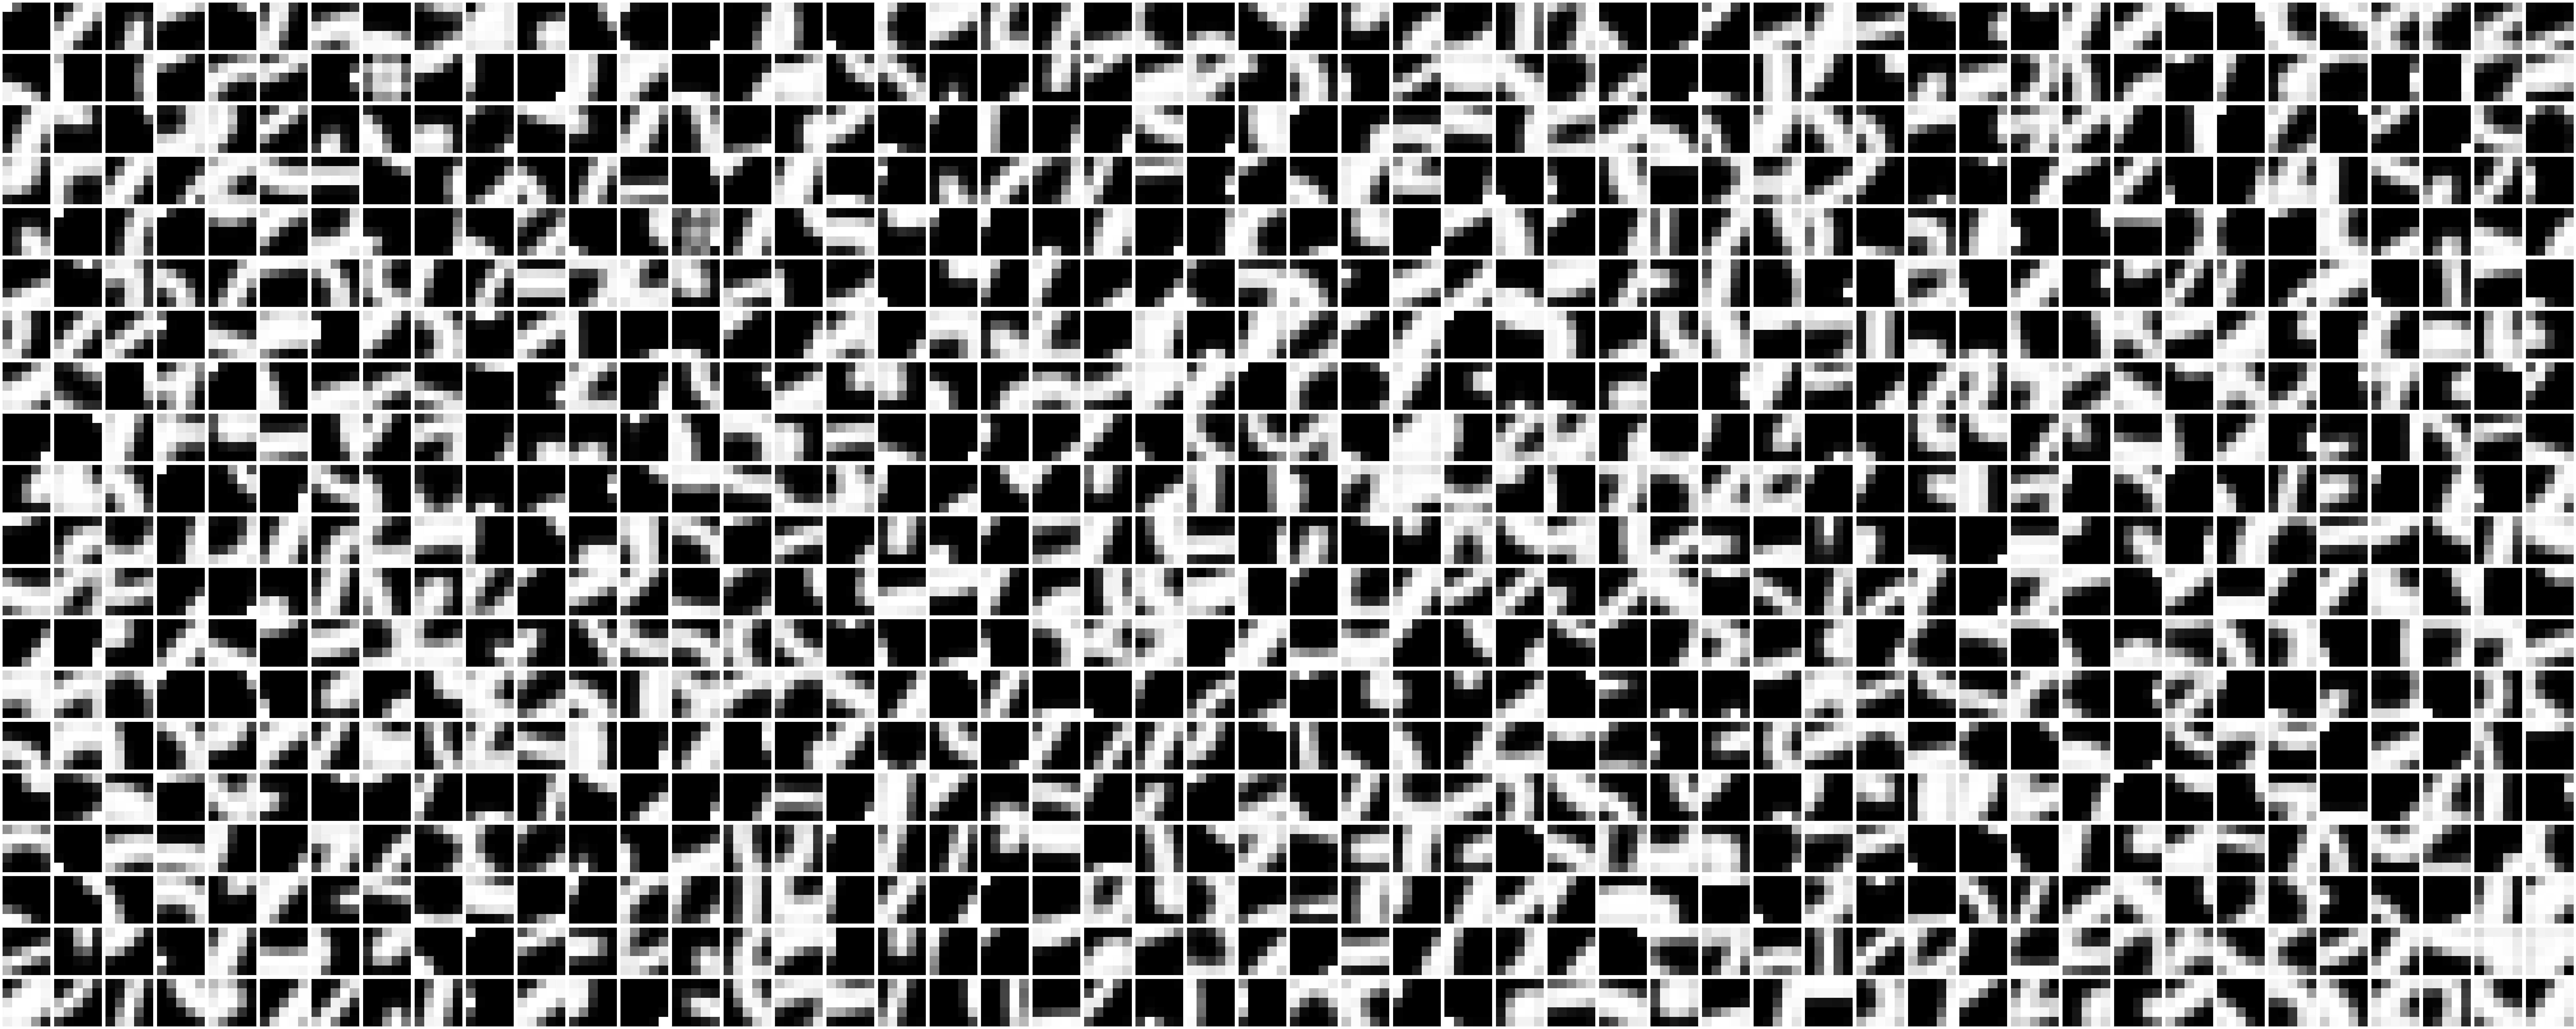

In [131]:
centers = k_equals_1000_models.cluster_centers_

fig, axs = plt.subplots(20, 50, figsize=(100, 40))
for i, ax in enumerate(axs.flatten()):
    patch = centers[i].reshape(5, 5)
    ax.imshow(patch, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

# K=10000

In [132]:
if os.path.exists("k_equals_10000_models.pkl"):
    k_equals_10000_models = joblib.load("k_equals_10000_models.pkl")
else:
    k_equals_10000_models = run_kmeans(patches, 10000)
    joblib.dump(k_equals_10000_models, "k_equals_10000_models.pkl")

if os.path.exists("k_equals_10000_normalized_models.pkl"):
    k_equals_10000_normalized_models = joblib.load("k_equals_10000_normalized_models.pkl")
else:
    k_equals_10000_normalized_models = run_kmeans(normalized_patches, 10000)
    joblib.dump(k_equals_10000_normalized_models, "k_equals_10000_normalized_models.pkl")

# Plot K=10000

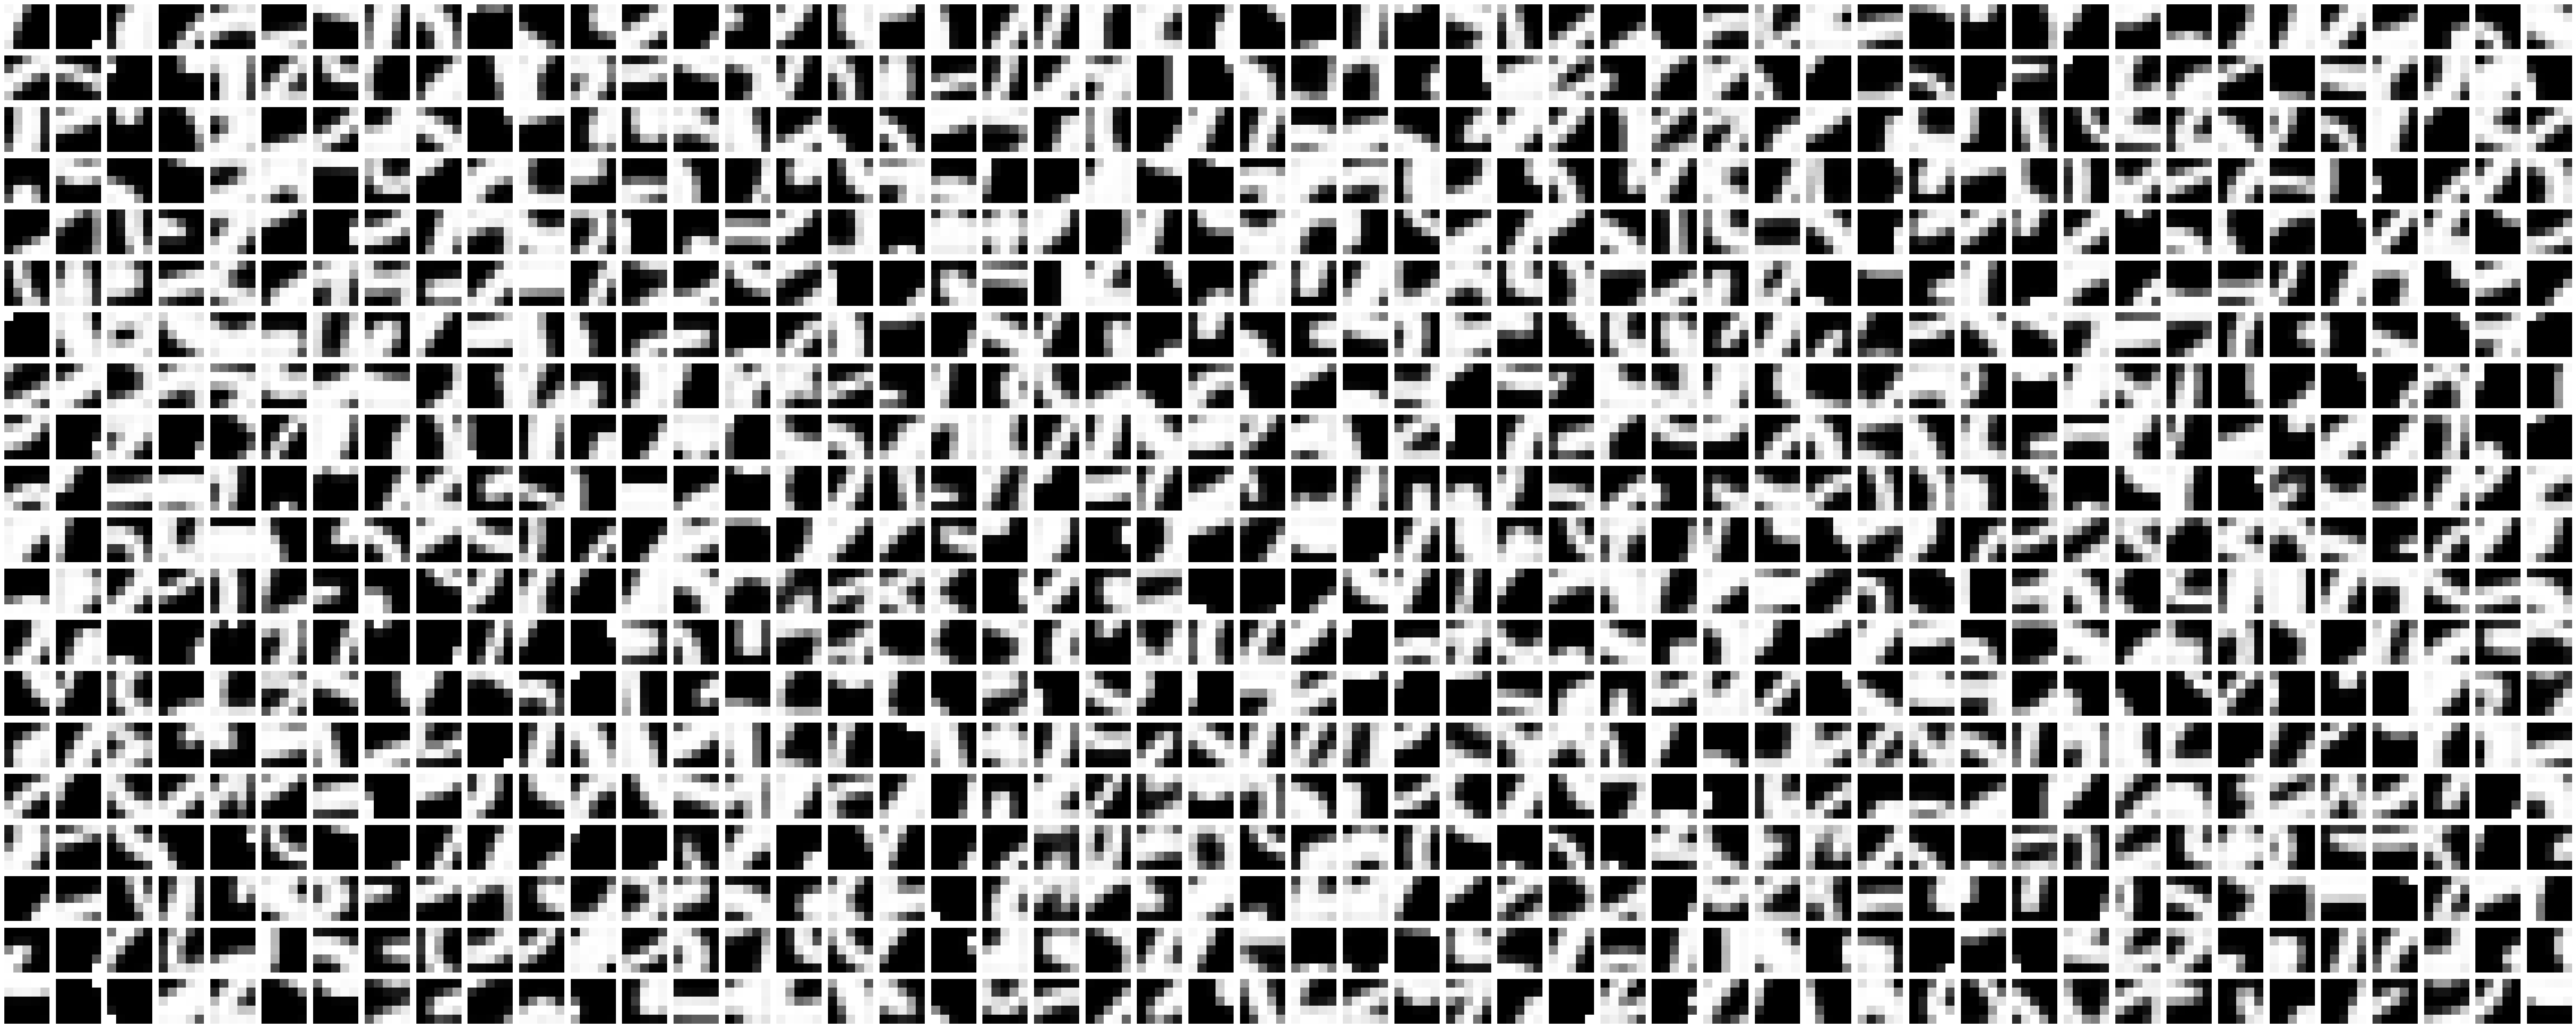

In [133]:
def show_centroids_grid(model, start=0, count=1000, patch_size=5, rows=20, cols=50):
    import matplotlib.pyplot as plt
    centers = model.cluster_centers_[start:start+count]
    fig, axs = plt.subplots(rows, cols, figsize=(cols*1.2, rows*1.2))
    for i, ax in enumerate(axs.flatten()):
        patch = centers[i].reshape(patch_size, patch_size)
        ax.imshow(patch, cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# 只显示其中1000个作为例子
for i in range(1):
    show_centroids_grid(k_equals_10000_models, start=i * 1000, count=1000)

# Inertia Models

In [134]:
models = []
for k in range(1, 5001, 100):
    if os.path.exists(f"models/k_equals_{k}_models.pkl"):
        print(f"正在加载: K = {k}")
        # models.append(joblib.load(f"models/k_equals_{k}_models.pkl"))
    else:
        model = run_kmeans(patches, k)
        joblib.dump(model, f"models/k_equals_{k}_models.pkl")
        # models.append(model)

正在加载: K = 1
正在加载: K = 101
正在加载: K = 201
正在加载: K = 301
正在加载: K = 401
正在加载: K = 501
正在加载: K = 601
正在加载: K = 701
正在加载: K = 801
正在加载: K = 901
正在加载: K = 1001
正在加载: K = 1101
正在加载: K = 1201
正在加载: K = 1301
正在加载: K = 1401
正在加载: K = 1501
正在加载: K = 1601
正在加载: K = 1701
正在加载: K = 1801
正在加载: K = 1901
正在加载: K = 2001
正在加载: K = 2101
正在加载: K = 2201
正在加载: K = 2301
正在加载: K = 2401
正在加载: K = 2501
正在加载: K = 2601
正在加载: K = 2701
正在加载: K = 2801
正在加载: K = 2901
正在加载: K = 3001
正在加载: K = 3101
正在加载: K = 3201
正在加载: K = 3301
正在加载: K = 3401
正在加载: K = 3501
正在加载: K = 3601
正在加载: K = 3701
正在加载: K = 3801
正在加载: K = 3901
正在加载: K = 4001
正在加载: K = 4101
正在加载: K = 4201
正在加载: K = 4301
正在加载: K = 4401
正在加载: K = 4501
正在加载: K = 4601
正在加载: K = 4701
正在加载: K = 4801
正在加载: K = 4901


# Inertia

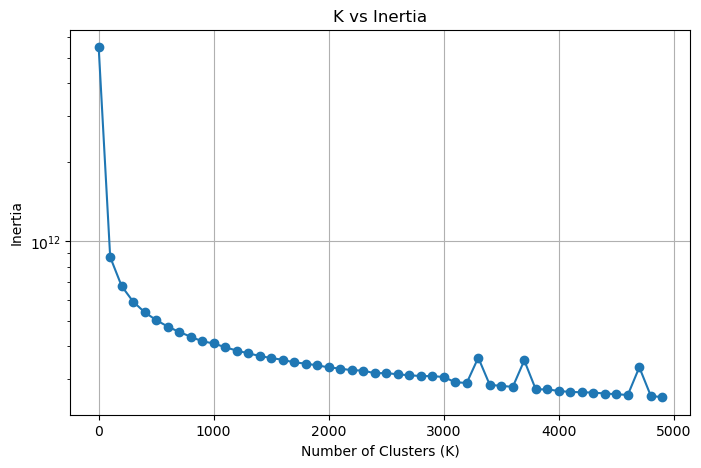

In [135]:
models = []
Ks = list(range(1, 5001, 100))
for k in Ks:
    models.append(joblib.load(f"models/k_equals_{k}_models.pkl"))
inertias = [model.inertia_ for model in models]
plt.figure(figsize=(8, 5))
plt.plot(Ks, inertias, marker='o', linestyle='-')
plt.yscale('log')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('K vs Inertia')
plt.grid(True)
plt.show()

# Patch Reconstruction 5X5

## Randomization

In [175]:
idx = np.random.randint(0, len(y_train))
test_image = y_train[idx]

i = np.random.randint(0, 24)
j = np.random.randint(0, 24)

test_patch = test_image[i:i+5, j:j+5]
test_patch_flat = test_patch.flatten()

## 5X5 Reconstruction Function

In [155]:
def reconstruction_model_5x5(model, patch_flat):
    distances = euclidean_distances(
        patch_flat.reshape(1, -1),
        model.cluster_centers_
    )

    closest_index = np.argmin(distances)
    reconstructed_patch_flat = model.cluster_centers_[closest_index]
    reconstructed_patch = reconstructed_patch_flat.reshape(5, 5)
    return reconstructed_patch

## K=10

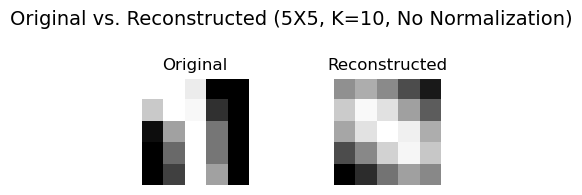

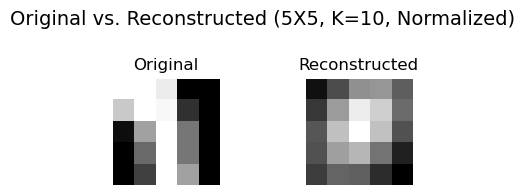

In [182]:
k_equals_10_reconstructed_patch  = reconstruction_model_5x5(k_equals_10_models, test_patch_flat)


fig, axs = plt.subplots(1, 2, figsize=(4, 2))
axs[0].imshow(test_patch, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(k_equals_10_reconstructed_patch, cmap='gray')
axs[1].set_title("Reconstructed")

for ax in axs:
    ax.axis('off')

fig.suptitle("Original vs. Reconstructed (5X5, K=10, No Normalization)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

k_equals_10_reconstructed_patch_normalized  = reconstruction_model_5x5(k_equals_10_normalized_models, test_patch_flat)
fig, axs = plt.subplots(1, 2, figsize=(4, 2))
axs[0].imshow(test_patch, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(k_equals_10_reconstructed_patch_normalized, cmap='gray')
axs[1].set_title("Reconstructed")

for ax in axs:
    ax.axis('off')

fig.suptitle("Original vs. Reconstructed (5X5, K=10, Normalized)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## K=50

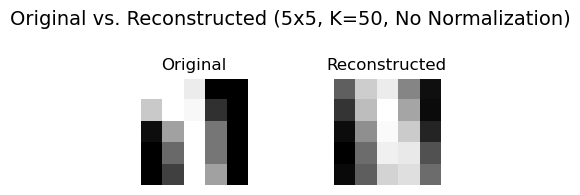

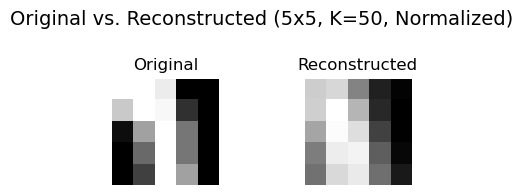

In [185]:
k_equals_50_reconstructed_patch = reconstruction_model_5x5(k_equals_50_models, test_patch_flat)

fig, axs = plt.subplots(1, 2, figsize=(4, 2))
axs[0].imshow(test_patch, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(k_equals_50_reconstructed_patch, cmap='gray')
axs[1].set_title("Reconstructed")

for ax in axs:
    ax.axis('off')

fig.suptitle("Original vs. Reconstructed (5x5, K=50, No Normalization)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


k_equals_50_reconstructed_patch_normalized = reconstruction_model_5x5(k_equals_50_normalized_models, test_patch_flat)

fig, axs = plt.subplots(1, 2, figsize=(4, 2))
axs[0].imshow(test_patch, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(k_equals_50_reconstructed_patch_normalized, cmap='gray')
axs[1].set_title("Reconstructed")

for ax in axs:
    ax.axis('off')

fig.suptitle("Original vs. Reconstructed (5x5, K=50, Normalized)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## K=100

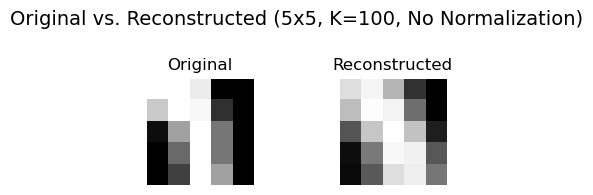

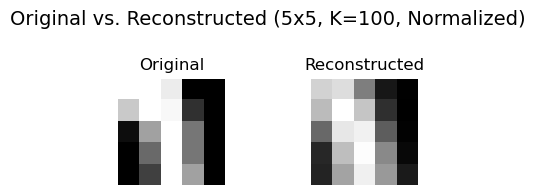

In [178]:
k_equals_100_reconstructed_patch = reconstruction_model_5x5(k_equals_100_models, test_patch_flat)

fig, axs = plt.subplots(1, 2, figsize=(4, 2))
axs[0].imshow(test_patch, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(k_equals_100_reconstructed_patch, cmap='gray')
axs[1].set_title("Reconstructed")

for ax in axs:
    ax.axis('off')

fig.suptitle("Original vs. Reconstructed (5x5, K=100, No Normalization)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



k_equals_100_reconstructed_patch_normalized = reconstruction_model_5x5(k_equals_100_normalized_models, test_patch_flat)

fig, axs = plt.subplots(1, 2, figsize=(4, 2))
axs[0].imshow(test_patch, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(k_equals_100_reconstructed_patch_normalized, cmap='gray')
axs[1].set_title("Reconstructed")

for ax in axs:
    ax.axis('off')

fig.suptitle("Original vs. Reconstructed (5x5, K=100, Normalized)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# K=1000

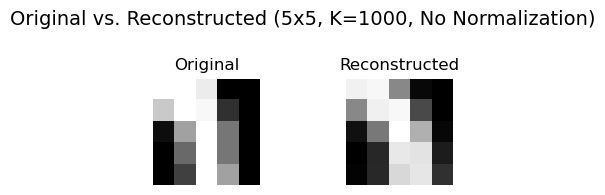

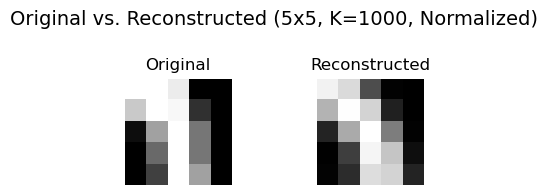

In [179]:
k_equals_1000_reconstructed_patch = reconstruction_model_5x5(k_equals_1000_models, test_patch_flat)

fig, axs = plt.subplots(1, 2, figsize=(4, 2))
axs[0].imshow(test_patch, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(k_equals_1000_reconstructed_patch, cmap='gray')
axs[1].set_title("Reconstructed")

for ax in axs:
    ax.axis('off')

fig.suptitle("Original vs. Reconstructed (5x5, K=1000, No Normalization)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

k_equals_1000_reconstructed_patch_normalized = reconstruction_model_5x5(k_equals_1000_normalized_models, test_patch_flat)

fig, axs = plt.subplots(1, 2, figsize=(4, 2))
axs[0].imshow(test_patch, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(k_equals_1000_reconstructed_patch_normalized, cmap='gray')
axs[1].set_title("Reconstructed")

for ax in axs:
    ax.axis('off')

fig.suptitle("Original vs. Reconstructed (5x5, K=1000, Normalized)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## K=10000

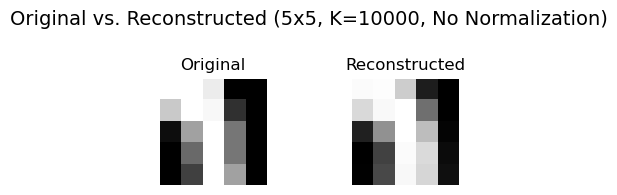

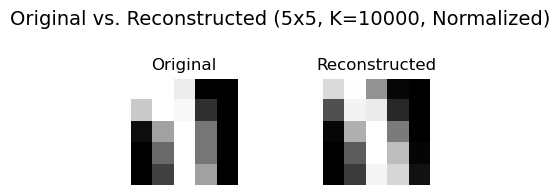

In [183]:
k_equals_10000_reconstructed_patch = reconstruction_model_5x5(k_equals_10000_models, test_patch_flat)

fig, axs = plt.subplots(1, 2, figsize=(4, 2))
axs[0].imshow(test_patch, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(k_equals_10000_reconstructed_patch, cmap='gray')
axs[1].set_title("Reconstructed")

for ax in axs:
    ax.axis('off')

fig.suptitle("Original vs. Reconstructed (5x5, K=10000, No Normalization)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

k_equals_10000_reconstructed_patch_normalized = reconstruction_model_5x5(k_equals_10000_normalized_models, test_patch_flat)

fig, axs = plt.subplots(1, 2, figsize=(4, 2))
axs[0].imshow(test_patch, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(k_equals_10000_reconstructed_patch_normalized, cmap='gray')
axs[1].set_title("Reconstructed")

for ax in axs:
    ax.axis('off')

fig.suptitle("Original vs. Reconstructed (5x5, K=10000, Normalized)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Patch Reconstruction 28x28

## Randomization

In [186]:
# 随机选取一张图像
idx = np.random.randint(0, len(y_train))
test_image = y_train[idx]

## 28X28 Reconstruction Function

In [195]:
def reconstruction_model_28x28(test_image, model, patch_size=5, stride=1):
    reconstructed_image = np.zeros_like(test_image, dtype=np.float32)
    count_image = np.zeros_like(test_image, dtype=np.float32)

    for i in range(0, test_image.shape[0] - patch_size + 1, stride):
        for j in range(0, test_image.shape[1] - patch_size + 1, stride):
            patch = test_image[i:i+patch_size, j:j+patch_size]
            patch_flat = patch.flatten()

            distances = euclidean_distances(
                patch_flat.reshape(1, -1),
                model.cluster_centers_
            )
            closest_index = np.argmin(distances)
            reconstructed_patch_flat = model.cluster_centers_[closest_index]
            reconstructed_patch = reconstructed_patch_flat.reshape(patch_size, patch_size)

            reconstructed_image[i:i+patch_size, j:j+patch_size] += reconstructed_patch
            count_image[i:i+patch_size, j:j+patch_size] += 1

    # 避免除以 0
    count_image[count_image == 0] = 1
    final_image = reconstructed_image / count_image

    return final_image

def visualize_28x28_reconstruction(test_image, model, title_suffix):
    final_image = reconstruction_model_28x28(test_image, model)
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    axs[0].imshow(test_image, cmap='gray')
    axs[0].set_title("Original")
    axs[1].imshow(final_image, cmap='gray')
    axs[1].set_title(f"Reconstructed")
    fig.suptitle(f"Original vs. Reconstructed (28x28, {title_suffix})", fontsize=14)
    for ax in axs:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## K=10

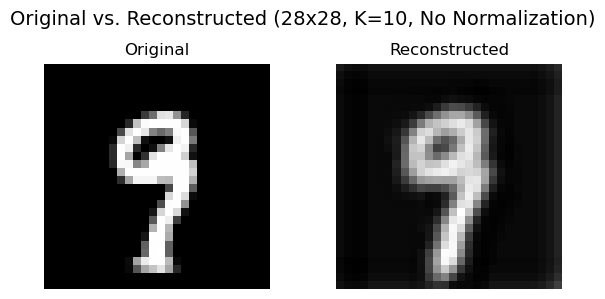

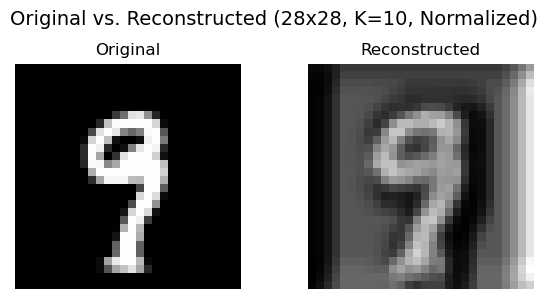

In [198]:
visualize_28x28_reconstruction(test_image, k_equals_10_models, "K=10, No Normalization")
visualize_28x28_reconstruction(test_image, k_equals_10_normalized_models, "K=10, Normalized")

## K=50

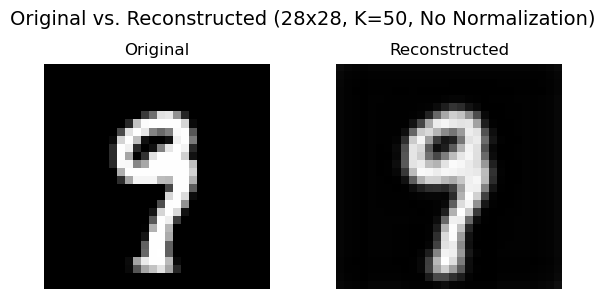

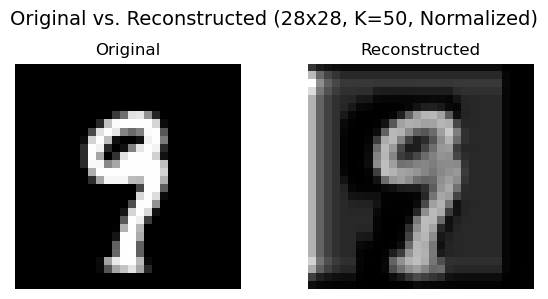

In [199]:
visualize_28x28_reconstruction(test_image, k_equals_50_models, "K=50, No Normalization")
visualize_28x28_reconstruction(test_image, k_equals_50_normalized_models, "K=50, Normalized")

## K=100

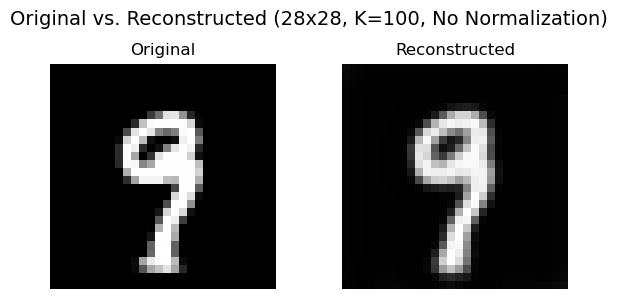

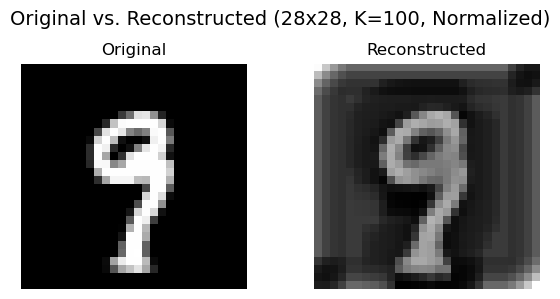

In [200]:
visualize_28x28_reconstruction(test_image, k_equals_100_models, "K=100, No Normalization")
visualize_28x28_reconstruction(test_image, k_equals_100_normalized_models, "K=100, Normalized")

## K=1000

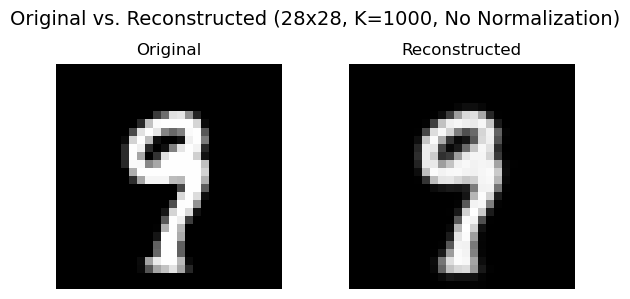

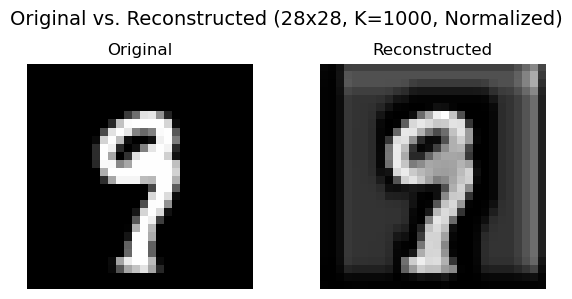

In [201]:
visualize_28x28_reconstruction(test_image, k_equals_1000_models, "K=1000, No Normalization")
visualize_28x28_reconstruction(test_image, k_equals_1000_normalized_models, "K=1000, Normalized")

## K=10000

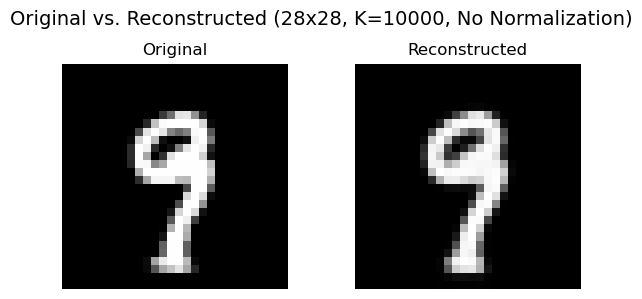

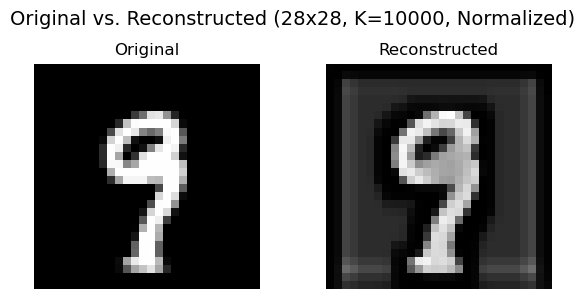

In [202]:
visualize_28x28_reconstruction(test_image, k_equals_10000_models, "K=10000, No Normalization")
visualize_28x28_reconstruction(test_image, k_equals_10000_normalized_models, "K=10000, Normalized")